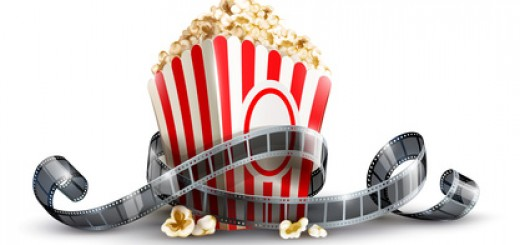

# FINAL PROJECT - Movie Genre Classification

Blanca Ubaque - 201725992

Carolina Trespalacios - 200313688

# 2. Solution using text and images with CNN

## Import libraries

In [1]:
 !pip install tqdm

    100% |████████████████████████████████| 51kB 5.0MB/s 
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [0]:
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from tqdm import tqdm
import skimage
from skimage import io
%matplotlib inline
from keras.datasets import cifar10
from keras.utils import np_utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [100]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [0]:
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## Read color images

In [0]:
file_id = '19g4Sphp6RdhvaM3fKXZYe7fxiRtH9Jmu'  
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile(downloaded['title'])

In [104]:
!unzip Images_resize.zip

Archive:  Images_resize.zip
replace Images_resize/0.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


## Read text files

In [0]:
file_id = '1OsaCbqeqWTQbctWRufsjX3zxXwVwmEIp'  
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile(downloaded['title'])

In [0]:
!rm -R data

In [109]:
!unzip data.zip

Archive:  data.zip
   creating: data/
  inflating: data/dataTesting.csv    
  inflating: data/dataTraining.csv   


In [0]:
dataTraining = pd.read_csv('data/dataTraining.csv', encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv('data/dataTesting.csv', encoding='UTF-8', index_col=0)

In [111]:
dataTraining

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6
9784,1943,The Ox-Bow Incident,two drifters are passing through a western tow...,"['Drama', 'Western']",8.1
8804,2004,Hellbent,two gay men on a date are murdered the night b...,"['Horror', 'Thriller']",5.5
3501,1941,How Green Was My Valley,adult huw morgan is about to move away from th...,"['Drama', 'Family']",7.8
7145,2008,Ghost Town,bertram pincus is a man whose people skills le...,"['Comedy', 'Drama', 'Fantasy', 'Romance']",6.7
4067,1996,Kingpin,roy munson was raised to be the best bowler in...,"['Comedy', 'Sport']",6.9


In [112]:
dataTesting

,year,title,plot
1,1999,Message in a Bottle,"who meets by fate , shall be sealed by fate ...."
4,1978,Midnight Express,"the true story of billy hayes , an american c..."
5,1996,Primal Fear,martin vail left the chicago da ' s office to ...
6,1950,Crisis,husband and wife americans dr . eugene and mr...
7,1959,The Tingler,the coroner and scientist dr . warren chapin ...
9,1961,Barabbas,"epic account of the thief barabbas , who was ..."
11,2005,Rize,reveals a groundbreaking dance phenomenon that...
13,2000,The Yards,"in the rail yards of queens , contractors rep..."
16,1992,Used People,"at her husband ' s funeral , pearl ( shirley..."
21,2004,My Baby's Daddy,"lonnie , dominic and ' g ' are three bachel..."


## Create y

In [0]:
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))
le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])

In [114]:
y_genres = y_genres[0:500,]
y_genres.shape

(500, 24)

## Load and reshape images

In [0]:
from skimage.transform import resize
image = io.imread(os.path.join('Images_resize', str(dataTraining.index[0]) + '.jpeg'))
image = resize(image, (32, 32,3), mode='reflect')

In [116]:
image.shape

(32, 32, 3)

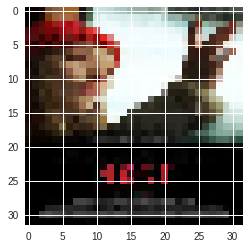

In [117]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.imshow(image, cmap='gray')

In [0]:
images_training = []
for i in range(0,500):
    images_training.append(io.imread(os.path.join('Images_resize', str(i) + '.jpeg')))

In [0]:
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.preprocessing import image

for i in range(0,500):
    images_training[i] = resize(images_training[i], (32,32,3), mode='reflect')

In [20]:
images_training[97].shape

(32, 32, 3)

In [21]:
images_training = np.stack(images_training)
images_training.shape

(500, 32, 32, 3)

## Train and test split

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images_training, y_genres, test_size=0.3, random_state=42)

In [23]:
X_train.shape

(350, 32, 32, 3)

## Modeling a CNN

In [0]:
from keras.datasets import cifar10 # subroutines for fetching the CIFAR-10 dataset
from keras.models import Model # basic class for specifying and training a neural network
from keras.layers import Input, Convolution2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.utils import np_utils # utilities for one-hot encoding of ground truth values
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [0]:
model2 = Sequential()
model2.add(Conv2D(32,(3,3), padding="same",input_shape=X_train.shape[1:]))
model2.add(Activation("relu"))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.5))
model2.add(Flatten())
model2.add(Dense(24))
model2.add(Activation('softmax'))
model2.compile("rmsprop", "categorical_crossentropy", metrics=["accuracy"])

In [70]:
model2.fit(X_train,y_train,epochs=50,verbose=2)

Epoch 1/50
 - 0s - loss: 3.4889 - acc: 0.5171
Epoch 2/50
 - 0s - loss: 3.4747 - acc: 0.4914
Epoch 3/50
 - 0s - loss: 3.4808 - acc: 0.4800
Epoch 4/50
 - 0s - loss: 3.4141 - acc: 0.4657
Epoch 5/50
 - 0s - loss: 3.4783 - acc: 0.4686
Epoch 6/50
 - 0s - loss: 3.4451 - acc: 0.4629
Epoch 7/50
 - 0s - loss: 3.4404 - acc: 0.4800
Epoch 8/50
 - 0s - loss: 3.4402 - acc: 0.4629
Epoch 9/50
 - 0s - loss: 3.4464 - acc: 0.4657
Epoch 10/50
 - 0s - loss: 3.4290 - acc: 0.4714
Epoch 11/50
 - 0s - loss: 3.4539 - acc: 0.4971
Epoch 12/50
 - 0s - loss: 3.4002 - acc: 0.4971
Epoch 13/50
 - 0s - loss: 3.4142 - acc: 0.4600
Epoch 14/50
 - 0s - loss: 3.4028 - acc: 0.4657
Epoch 15/50
 - 0s - loss: 3.4214 - acc: 0.4714
Epoch 16/50
 - 0s - loss: 3.4050 - acc: 0.4571
Epoch 17/50
 - 0s - loss: 3.4232 - acc: 0.4429
Epoch 18/50
 - 0s - loss: 3.4111 - acc: 0.4886
Epoch 19/50
 - 0s - loss: 3.4138 - acc: 0.4486
Epoch 20/50
 - 0s - loss: 3.4373 - acc: 0.4629
Epoch 21/50
 - 0s - loss: 3.4043 - acc: 0.4486
Epoch 22/50
 - 0s - lo

In [71]:
# make predictions for testing set
y_pred1 = model2.predict_proba(X_test)
y_pred1

array([[1.81029186e-01, 4.75799069e-02, 4.07959051e-05, ...,
        1.84188679e-01, 8.73016845e-03, 1.76268387e-07],
       [4.44512320e-04, 6.97535975e-03, 1.76863762e-06, ...,
        8.64976738e-03, 2.86752747e-05, 3.03139842e-08],
       [3.42671115e-06, 9.80897494e-06, 2.47197374e-10, ...,
        1.35070557e-04, 7.08721336e-06, 4.54765947e-11],
       ...,
       [2.89761461e-02, 1.87727269e-02, 2.54680490e-05, ...,
        3.57147343e-02, 2.62691011e-03, 2.03554460e-04],
       [6.56999573e-02, 2.99117994e-03, 2.51365454e-05, ...,
        1.79411516e-01, 2.92835699e-04, 1.11096386e-04],
       [1.85383745e-02, 2.93514039e-02, 1.21073471e-03, ...,
        2.30130613e-01, 5.15742751e-04, 1.28718048e-05]], dtype=float32)

In [72]:
y_pred1.shape

(150, 24)

In [0]:
y_pred1[y_pred1>=0.5]=1
y_pred1[y_pred1<0.5]=0

In [74]:
print('The accuracy of the model is ',(y_pred1==y_test).mean())

The accuracy of the model is  0.8927777777777778


## Load and reshape testing images

In [31]:
images_testing = []
for i in tqdm(dataTesting.index):
    images_testing.append(io.imread(os.path.join('Images_resize', str(i) + '.jpeg')))

100%|██████████| 3383/3383 [00:04<00:00, 826.77it/s]


In [32]:
dataTesting.shape

(3383, 3)

In [0]:
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.preprocessing import image

for i in range(0,3383):
    images_testing[i] = resize(images_testing[i], (32,32,3), mode='reflect')

In [34]:
images_testing = np.stack(images_testing)
images_testing.shape

(3383, 32, 32, 3)

In [185]:
# make predictions for testing set
y_pred2 = model2.predict_proba(images_testing)
y_pred2

array([[1.48695046e-02, 9.39822290e-03, 1.03844423e-03, ...,
        3.46232168e-02, 2.36389926e-04, 1.01738761e-03],
       [2.75438279e-01, 8.42345040e-03, 3.79771081e-04, ...,
        2.81111419e-01, 3.87251377e-03, 1.88604216e-04],
       [1.20697655e-02, 9.36807413e-03, 1.50539156e-04, ...,
        1.28845675e-02, 3.43163474e-03, 4.61500049e-01],
       ...,
       [1.54908448e-05, 2.07163641e-04, 2.99633274e-09, ...,
        1.07860137e-02, 1.17464224e-04, 4.91289995e-11],
       [3.50295776e-03, 1.54587105e-02, 6.13432292e-07, ...,
        4.58036661e-01, 5.49132295e-04, 1.16697052e-07],
       [1.78136583e-02, 6.44005556e-03, 3.76892558e-06, ...,
        7.90488869e-02, 3.60375713e-03, 2.01741932e-05]], dtype=float32)

In [0]:
cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

df = pd.DataFrame(y_pred2, index=dataTesting.index, columns=cols).to_csv('pred_genres_img_CNN.csv', index_label='ID')

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [38]:
uploaded = drive.CreateFile({'title': 'pred_genres_img_CNN.csv'})
uploaded.SetContentFile('pred_genres_img_CNN.csv')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1WQ-JBfq-92h1G0uHlVJDMQqhvLEeQia_


# Text Analysis

In [0]:
import pandas as pd
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split

## Load Data

In [0]:
path = '../PROYECTODEEP/'

In [0]:
dataTraining = pd.read_csv(os.path.join(path, 'data', 'dataTraining.csv'), encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv(os.path.join(path, 'data', 'dataTesting.csv'), encoding='UTF-8', index_col=0)

In [92]:
dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"[Short, Drama]",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"[Comedy, Crime, Horror]",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","[Drama, Film-Noir, Thriller]",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",[Drama],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","[Action, Crime, Thriller]",6.6


In [93]:
dataTesting.head()

,year,title,plot
1,1999,Message in a Bottle,"who meets by fate , shall be sealed by fate ...."
4,1978,Midnight Express,"the true story of billy hayes , an american c..."
5,1996,Primal Fear,martin vail left the chicago da ' s office to ...
6,1950,Crisis,husband and wife americans dr . eugene and mr...
7,1959,The Tingler,the coroner and scientist dr . warren chapin ...


In [122]:
vect = CountVectorizer(ngram_range=(1, 2), max_features=2000)
X_dtm = vect.fit_transform(dataTraining['plot'])
X_dtm.shape

(7895, 2000)

In [193]:
X_dtm

<7895x2000 sparse matrix of type '<class 'numpy.int64'>'
	with 569377 stored elements in Compressed Sparse Row format>

In [124]:
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))

le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])
y_genres

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0]])

In [125]:
y_genres.shape

(7895, 24)

In [0]:
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_dtm, y_genres, test_size=0.3, random_state=42)

In [127]:
X_train.shape

(5526, 2000)

In [128]:
X_test.shape

(2369, 2000)

In [129]:
y_train_genres.shape

(5526, 24)

In [130]:
y_test_genres.shape

(2369, 24)

In [0]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Dropout, Activation, BatchNormalization, Conv1D, GlobalMaxPooling1D
from keras.optimizers import RMSprop
from keras.callbacks import History
from livelossplot import PlotLossesKeras

In [0]:
model = Sequential()
model.add(Dense(256, input_shape=(2000,)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(24))
model.add(Activation('sigmoid'))

In [134]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               512256    
_________________________________________________________________
activation_7 (Activation)    (None, 256)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 24)                6168      
_________________________________________________________________
activation_8 (Activation)    (None, 24)                0         
Total params: 519,448
Trainable params: 518,936
Non-trainable params: 512
_________________________________________________________________


In [0]:
model.compile("rmsprop", "categorical_crossentropy", metrics=["accuracy"])

In [161]:
y_train_genres.shape

(5526, 24)

In [162]:
model.fit(X_train,y_train_genres,epochs=20,verbose=2)

Epoch 1/20
 - 1s - loss: 3.9297 - acc: 0.4859
Epoch 2/20
 - 1s - loss: 3.9438 - acc: 0.4770
Epoch 3/20
 - 1s - loss: 3.9169 - acc: 0.4718
Epoch 4/20
 - 1s - loss: 3.9259 - acc: 0.4794
Epoch 5/20
 - 1s - loss: 3.9468 - acc: 0.4758
Epoch 6/20
 - 1s - loss: 3.9566 - acc: 0.4718
Epoch 7/20
 - 1s - loss: 3.9760 - acc: 0.4712
Epoch 8/20
 - 1s - loss: 3.9675 - acc: 0.4745
Epoch 9/20
 - 1s - loss: 3.9600 - acc: 0.4928
Epoch 10/20
 - 1s - loss: 3.9768 - acc: 0.4705
Epoch 11/20
 - 1s - loss: 3.9877 - acc: 0.4674
Epoch 12/20
 - 1s - loss: 3.9928 - acc: 0.4779
Epoch 13/20
 - 1s - loss: 3.9882 - acc: 0.4803
Epoch 14/20
 - 1s - loss: 3.9404 - acc: 0.4736
Epoch 15/20
 - 1s - loss: 3.9695 - acc: 0.4692
Epoch 16/20
 - 1s - loss: 3.9508 - acc: 0.4767
Epoch 17/20
 - 1s - loss: 3.9537 - acc: 0.4821
Epoch 18/20
 - 1s - loss: 4.0106 - acc: 0.4797
Epoch 19/20
 - 1s - loss: 3.9848 - acc: 0.4810
Epoch 20/20
 - 1s - loss: 3.9760 - acc: 0.4770


In [182]:
# make predictions for testing set
y_pred3= model.predict(X_train)
y_pred3

array([[9.54215977e-08, 5.66904526e-03, 9.23815131e-01, ...,
        7.21152048e-07, 5.54890903e-05, 8.99591851e-06],
       [4.78592028e-07, 3.99547346e-08, 4.41540493e-08, ...,
        9.96905625e-01, 9.25928816e-07, 2.77321965e-06],
       [6.06495831e-09, 9.76728565e-09, 6.85774921e-07, ...,
        8.10237725e-06, 1.05595284e-07, 2.97468614e-05],
       ...,
       [1.23691677e-07, 1.76194771e-11, 8.68119230e-07, ...,
        1.39489840e-03, 1.29548667e-07, 1.59545266e-07],
       [1.74916636e-07, 1.64367140e-16, 7.83942193e-13, ...,
        9.99999523e-01, 2.30539589e-12, 1.01075971e-11],
       [3.23529908e-04, 4.89570899e-03, 8.39816511e-01, ...,
        8.55900627e-03, 8.31156410e-03, 5.18787187e-03]], dtype=float32)

In [0]:
y_pred3[y_pred3>=0.5]=1
y_pred3[y_pred3<0.5]=0

In [184]:
y_pred3

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [175]:
print('The accuracy of the nnet model is ',(y_pred2==y_train_genres).mean())

The accuracy of the nnet model is  0.9924825069369043


In [0]:
clf = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, n_estimators=97, max_depth=10, random_state=412))

In [177]:
clf.fit(X_train, y_train_genres)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=97, n_jobs=-1,
            oob_score=False, random_state=412, verbose=0, warm_start=False),
          n_jobs=1)

In [0]:
y_pred_genres5 = clf.predict_proba(X_test)

In [0]:
X_test_dtm = vect.transform(dataTesting['plot'])

cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

y_pred_test_genres = clf.predict_proba(X_test_dtm)

pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols).to_csv('pred_genres_text_RF.csv', index_label='ID')

In [196]:
vect = CountVectorizer(ngram_range=(1, 2), max_features=2000)
X_dtm1 = vect.fit_transform(dataTesting['plot'])
X_dtm1.shape

(3383, 2000)

In [0]:
y_pred_genres6 = clf.predict_proba(X_dtm1)

In [187]:
y_pred_genres5.shape

(2369, 24)

In [188]:
y_pred2.shape

(3383, 24)

In [189]:
dataTesting.shape

(3383, 3)

In [0]:
Ynew3 = (np.array(y_pred_genres6) + np.array(y_pred2)) / 2

In [208]:
Ynew3

array([[0.12073582, 0.07627384, 0.01370955, ..., 0.13846546, 0.02158688,
        0.01067009],
       [0.20342739, 0.05210672, 0.01785117, ..., 0.24148455, 0.01366558,
        0.01027961],
       [0.11371158, 0.10415122, 0.03776386, ..., 0.20971409, 0.10225908,
        0.28222561],
       ...,
       [0.09365304, 0.0579217 , 0.01673076, ..., 0.11243362, 0.0345361 ,
        0.01040814],
       [0.08575354, 0.09888861, 0.0383056 , ..., 0.36334501, 0.04346163,
        0.02617663],
       [0.0796518 , 0.06631405, 0.012337  , ..., 0.16378473, 0.01405756,
        0.01058027]])

In [204]:
y_test_genres.shape

(2369, 24)

In [205]:
Ynew3.shape

(3383, 24)